# 感知机

* 感知机是二类分类的线性分类模型，输入为实例的特征向量，输出为实例的类别，取`+1`和`-1`二值。
* 感知机模型
$$ f(x)=sign(w·x+b) $$
`w`和`b`为感知机模型参数。感知机对应于输入空间中的分离超平面`w·x+b=0`。

* 符号函数
$$sign(x)=\begin{cases}
& +1 \text{ if } x\ge0 \\
& -1 \text{ if } x<0
\end{cases}$$

### 感知机学习策略

* 目标是求得一个能够将训练集正实例点和负实例点完全正确分开的分离超平面。
* 感知机学习的策略是极小化损失函数：
$$min_{w,b}L(w,b)=-\sum_{x_{i}\in M}y_i(w·x_i+b)$$
损失函数对应于误分类点到分离超平面的总距离。

### 感知机学习算法

* 感知机学习算法是基于随机梯度下降法的对损失函数的最优化算法，有`原始形式`和`对偶形式`。算法简单且易于实现。

* **原始形式**
    * 首先任意选取一个超平面，然后用梯度下降法不断极小化目标函数。在这个过程中一次随机选取一个误分类点使其梯度下降。
    $$ \bigtriangledown _wL(w,b)=-\sum_{x_i\in M}y_ix_i\\
    \bigtriangledown _bL(w,b)=-\sum_{x_i\in M}y_i
    $$

随机选取一个误分类点$(x_i,y_i)$，对w，b进行更新：
$$w \gets w+\eta y_ix_i\\
b \gets b+\eta y_i
$$

* 步骤
    * （1）选取初值$w_0, b_0$；
    * （2）在训练集中选取数据$(x_i, y_i)$；
    * （3）如果$y_i(w·x_i+b)\le0$，执行参数更新；
    * （4）转至（2），直至训练集中没有误分类点；

解释：当一个实例点被误分类，即位于分离超平面的错误一侧时，则调整`w, b`的值，使分离超平面向该误分类点的一侧移动，以减少该误分类点与超平面间的距离，直至超平面越过该误分类点使其被正确分类。

* 当训练数据集线性可分时，感知机学习算法是收敛的。感知机算法在训练数据集上的误分类次数`k`满足不等式：
$$
xk\le(\frac{R}{\gamma})^2
$$
当训练数据集线性可分时，感知机学习算法存在无穷多个解，其解由于不同的初值或不同的迭代顺序而可能有所不同。

* **对偶形式**

* 将`w`和`b`表示为实例$x_i$和标记$y_i$的线性组合的形式，通过求解其系数而求得`w`和`b`。
* 感知机模型
$$ f(x)=sign(\sum_{j=1}^Na_jy_jx_j·x+b) $$

* 步骤
    * （1）$a \gets 0, b \gets 0$；
    * （2）在训练集选取数据$(x_i, y_i)$；
    * （3）如果$y_i(\sum_{j=1}^N a_jy_jx_j·x_i+b)\le0$，则（先更新对应x的`a`和`b`，再更新`w`和`b`）
    $$ a_i \gets a_i+\eta\\
b \gets b+\eta y_i\\
w=\sum_{i=1}^Na_iy_ix_i\\
b=\sum_{i=1}^Na_iy_i $$
    * （4）转至（2）直到没有误分类数据。

### 代码实现一个感知机模型

#### 使用iris数据集中两个分类的数据和【length, width]作为特征

In [181]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [182]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [183]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [184]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

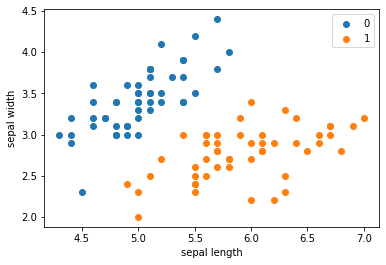

In [185]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [186]:
data = np.array(df.iloc[:100, [0, 1, -1]])

In [187]:
X, y = data[:, :-1], data[:, -1]

In [188]:
y = np.array([1 if i == 1 else -1 for i in y])

### perceptron

In [189]:
# 数据线性可分，二分类数据
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype = np.float32)# 初始化w
        self.b = 0
        self.l_rate = 0.1
        
    # 符号函数
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
    
    # 随机梯度下降
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
#                 print(X)
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:   # 被误分类
                    self.w = self.w + self.l_rate * np.dot(y, X)   # 更新w
                    self.b = self.b + self.l_rate * y    # 更新b
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
                
        return 'perceptron model!'
    def score(self):
        pass

In [190]:
perceptron = Model()
perceptron.fit(X, y)

'perceptron model!'

In [191]:
print(perceptron.w)
print(perceptron.b)

[  7.8 -10. ]
-12.099999999999973


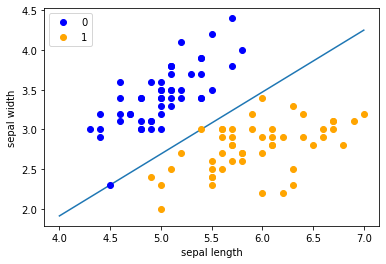

In [192]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### 调用scikit-learn实现感知机

In [43]:
import sklearn
from sklearn.linear_model import Perceptron

In [51]:
clf = Perceptron(fit_intercept=True,
                max_iter=1000,
                shuffle=True,
                tol=None)
clf.fit(X, y)

Perceptron(tol=None)

In [52]:
clf.coef_    # w

array([[ 70.7, -87.9]])

In [53]:
clf.intercept_   # b

array([-117.])

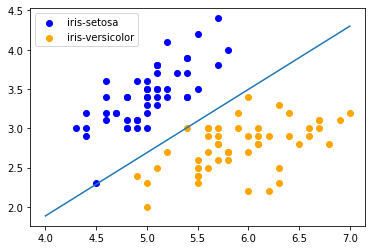

In [54]:
plt.scatter(data[:50, 0], data[:50,1], color = 'blue', label='iris-setosa',)
plt.scatter(data[50:100, 0], data[50:100,1], color = 'orange', label='iris-versicolor',)

x_points = np.arange(4, 8)
y_ = -(clf.coef_[0][0] * x_points + clf.intercept_) / clf.coef_[0][1]
plt.plot(x_points, y_)
plt.legend()

### 感知机简单计算

In [201]:
x = np.array([[3, 3], [4,3], [1,1]])
y = np.array([1, 1, -1])

In [202]:
w = np.array([0.0, 0.0])
b = 0

In [203]:
is_wrong = False
j = 0
while not is_wrong:
    j += 1
    wrong_counts = 0
    for i in range(len(x)):
        if y[i] * (np.dot(x[i], w) + b) <= 0:
            w = w + 1 * np.dot(y[i], x[i])
            b = b + 1 * y[i]
            wrong_counts += 1
    if wrong_counts == 0:
        is_wrong = True

In [204]:
print(w, b)

[1. 1.] -3


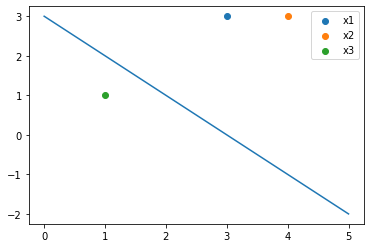

In [205]:
plt.scatter(x[0][0], x[0][1], label='x1')
plt.scatter(x[1][0], x[1][1], label='x2')
plt.scatter(x[2][0], x[2][1], label='x3')
x_p = np.linspace(0, 5, 10)
y_p = -(w[0] * x_p + b) / w[1]
plt.plot(x_p, y_p)
plt.legend()